In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from datetime import datetime
import seaborn as sns

## 이더리움 포함

In [461]:
match_list = ['금.csv', '은.csv','유가.csv','코스피.csv', '나스닥.csv','테슬라.csv','비트코인.csv','이더리움.csv']

start = '2011-01-01' # 이더리움 start : 2016-03-10
end = '2021-02-10'
start_y = start.split('-')[0]
end_y = end.split('-')[0]
freq = 'D'
title = f'({freq} 기준) {start} - {end} 자산간 상관관계'

df_list = list()

for i, df_nm in enumerate(match_list):
    df = pd.read_csv(r'C:\Users\park\Documents\data_set\Economic\{}'.format(df_nm), encoding='utf-8-sig')
    dates = df['날짜']
    dates = dates.str.replace('년','-').str.replace('월','-').str.replace('일','')
    df['종가'] = df['종가'].replace(',','', regex=True).astype(float)
    dates = pd.to_datetime(dates)
    df['날짜'] = dates
    df = df[['날짜','종가']]
    df.rename(columns = {'종가':'{}'.format(df_nm.split('.')[0])})

    if len(df) > 1303:
        val = df['종가'].tolist()
        s = pd.Series(val, index = df['날짜'])
        s = s.sort_index()
        s = s[start:end]
        df = pd.DataFrame(s, index = s.index, columns = ['{}'.format(df_nm.split('.')[0])])
        
    df_list.append(df)

## 이더리움 제외

In [16]:
match_list = ['금.csv', '은.csv','유가.csv','코스피.csv', '나스닥.csv','테슬라.csv','비트코인.csv']

start = '2011-01-01' # 이더리움 start : 2016-03-10
end = '2021-02-10'
start_y = start.split('-')[0]
end_y = end.split('-')[0]
freq = 'D'
title = f'({freq} 기준) {start} - {end} 자산간 상관관계'


df_list = list()

for i, df_nm in enumerate(match_list):
    df = pd.read_csv(r'C:\Users\park\Documents\data_set\Economic\{}'.format(df_nm), encoding='utf-8-sig')
    dates = df['날짜']
    dates = dates.str.replace('년','-').str.replace('월','-').str.replace('일','')
    df['종가'] = df['종가'].replace(',','', regex=True).astype(float)
    dates = pd.to_datetime(dates)
    df['날짜'] = dates
    df = df[['날짜','종가']]
    df.rename(columns = {'종가':'{}'.format(df_nm.split('.')[0])})

    val = df['종가'].tolist()
    s = pd.Series(val, index = df['날짜'])
    s = s.sort_index()
    s = s[start:end]
    df = pd.DataFrame(s, index = s.index, columns = ['{}'.format(df_nm.split('.')[0])])

    df_list.append(df)

## join 및 시각화

In [17]:
for i, val in enumerate(df_list):
    if i == 0:
        df_join = df_list[i]
    elif i <= len(df_list):
        df_join = df_join.join(df_list[i])
    else:
        continue
        
df_join = df_join.fillna(0)

if freq != 'D':
    df_join = df_join.resample(f'{freq}', kind = 'period').mean().copy()

In [18]:
df_join.to_csv(f'asset_{freq}.csv', encoding = 'utf-8-sig')

In [9]:
df_join = df_join[start_y:end_y]

In [7]:
df_join.corr()

,금,은,유가,코스피,나스닥,테슬라,비트코인
금,1.000000,0.792771,0.519944,-0.109386,-0.356429,-0.627089,-0.067378
은,0.792771,1.000000,0.689765,-0.177880,-0.713527,-0.854741,-0.421427
유가,0.519944,0.689765,1.000000,-0.171371,-0.616491,-0.659429,-0.327577
코스피,-0.109386,-0.177880,-0.171371,1.000000,0.463291,0.441776,0.493187
나스닥,-0.356429,-0.713527,-0.616491,0.463291,1.000000,0.843540,0.829174
테슬라,-0.627089,-0.854741,-0.659429,0.441776,0.843540,1.000000,0.588356
비트코인,-0.067378,-0.421427,-0.327577,0.493187,0.829174,0.588356,1.000000


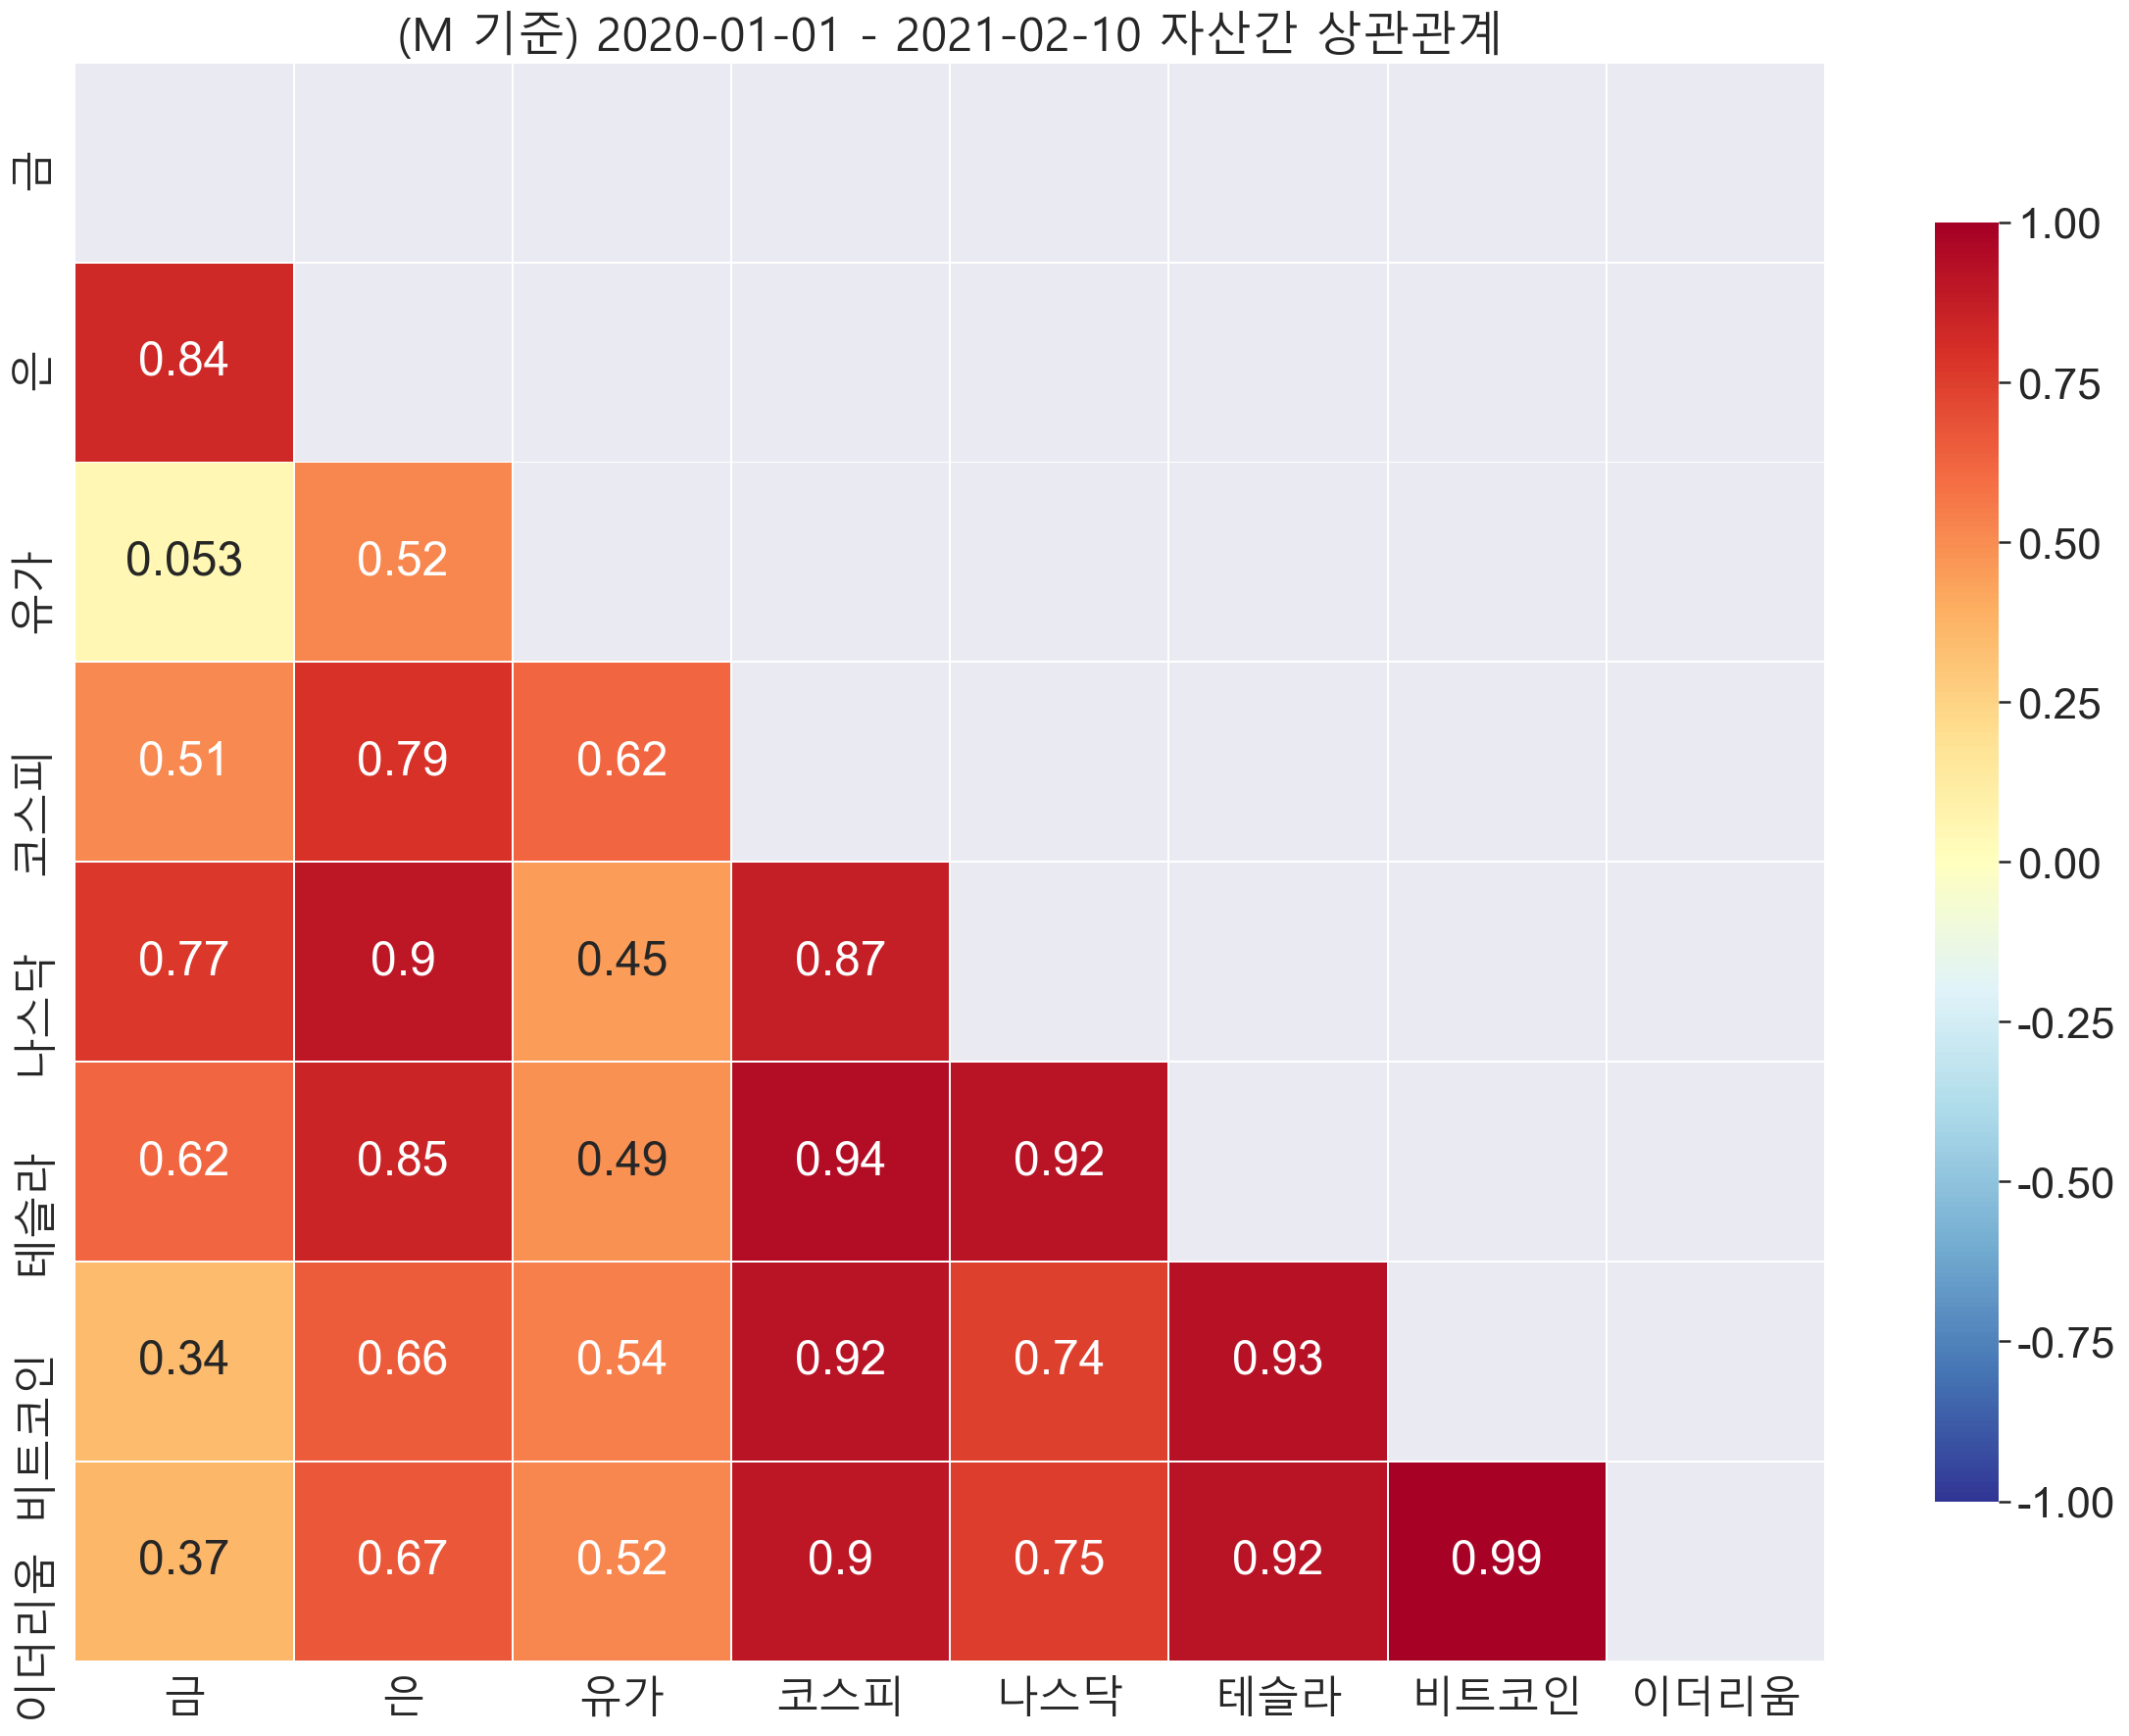

In [466]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)
set_matplotlib_formats('retina')

df = df_join.corr()


# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(20,15) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.set(font_scale = 2)
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .8},# 컬러바 크기 절반으로 줄이기 : 5
            vmin = -1,vmax = 1
           ).set_title(title)  
plt.savefig(f'{title}.png')